# Bar graph: top 10 highest scoring teams

<BarContainer object of 10 artists>

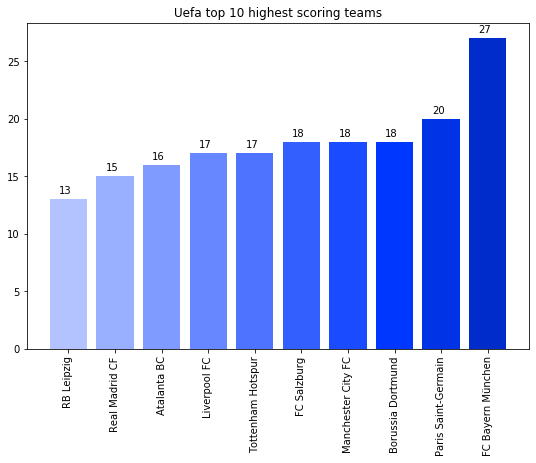

In [12]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plot
import os

#mongo conf
myclient = MongoClient("mongodb://localhost:27017/")
mydb = myclient["uefa"]
mycol = mydb["players"]

# query with aggregation: groups by team and sums the goals of every player of each team
query = [{"$group" : {"_id" : "$team", "totalgoals" : {"$sum" : "$goals"}}}]
teams = mycol.aggregate(query)

# save team names and goals in tuples, and the tuples in a list
teamList = []
for team in teams:
    teamName = team["_id"]
    goals = team["totalgoals"]
    new = ((teamName),(goals))
    teamList.append(new)
    
# pass the list into a dataframe, sort by goals and show only the last 10 teams
teams_df = pd.DataFrame(teamList, columns=["Teams:", "Goals:"])
ten_highest = teams_df.sort_values(by="Goals:").tail(10)

# save number of elements: goals and teams
nGoals = ten_highest["Goals:"]
nTeams = ten_highest["Teams:"]

# save bar colors
my_colors = ['#b3c3ff', '#99afff', '#809bff', '#6687ff', '#4d73ff', '#335fff', '#1a4bff', '#0037ff', '#0032e6', '#002ccc', '#0027b3', '#002199', '#001c80', '#001666', '#00114d', '#000d3a']

# set size of figure
fig = plot.figure(figsize = [9,6])

# set rotation of team names to 90 deg
plot.xticks(rotation=90)
plot.title("Uefa top 10 highest scoring teams")

# set text to show the number above each bar
for index, value in enumerate(ten_highest["Goals:"]):
    plot.text(index-0.2, value+0.5, str(value))

# show bar, with configuration values as arguments
plot.bar(height = nGoals, x = nTeams, color=my_colors)